<a href="https://colab.research.google.com/github/Roua-romdhani/Superstore-Sales-Analysis./blob/main/superstoreorder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      31223 non-null  datetime64[ns]
 2   ship_date       0 non-null      datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-nu

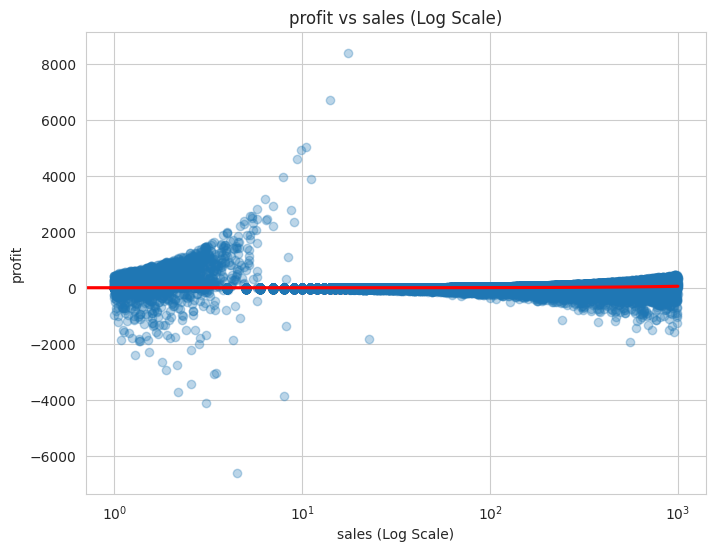

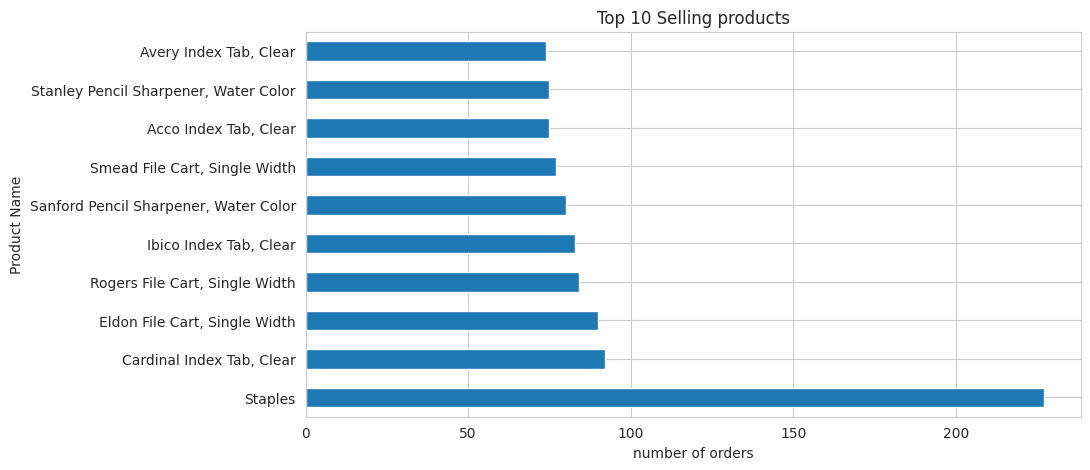

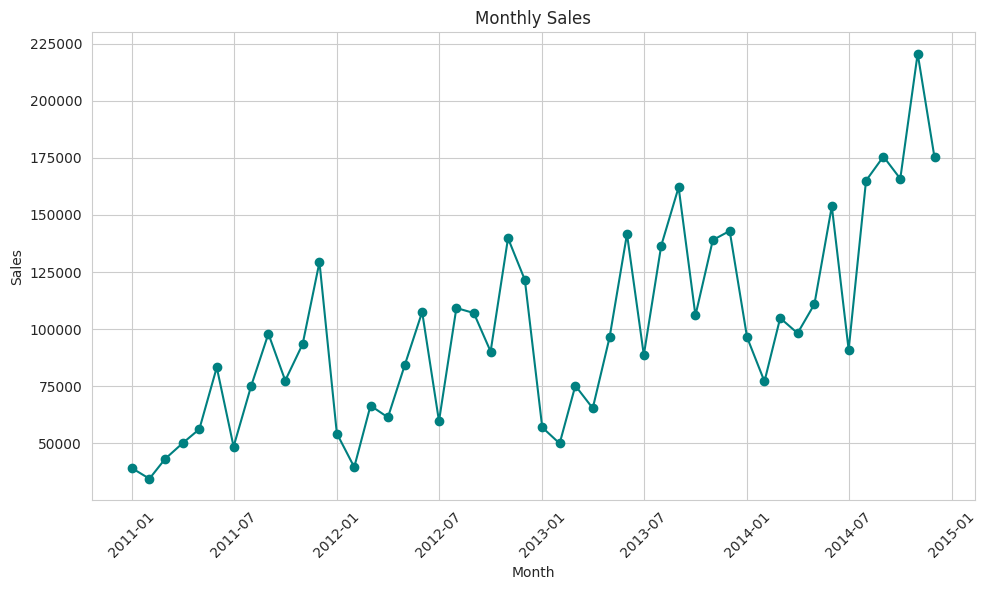

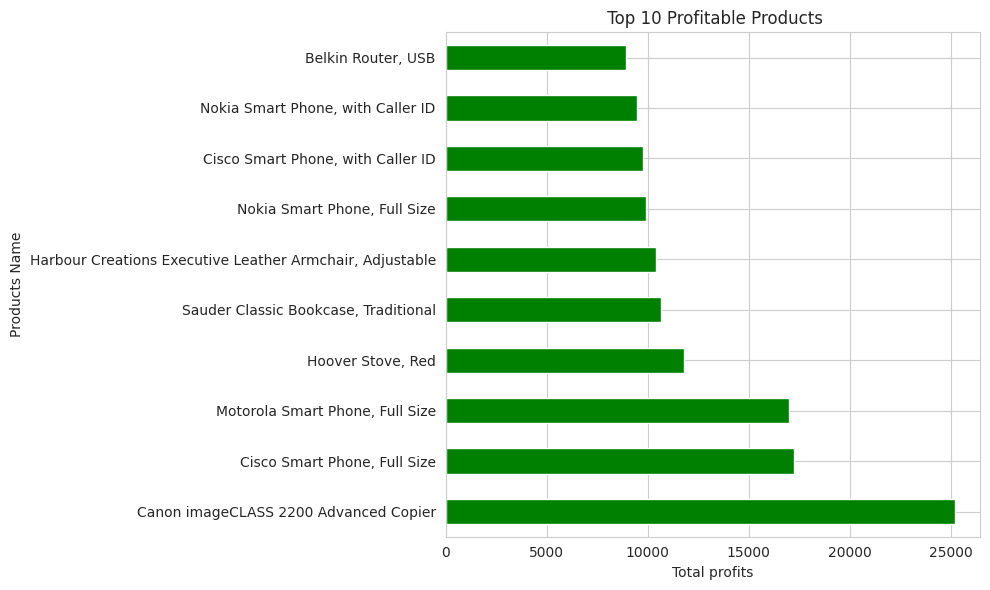

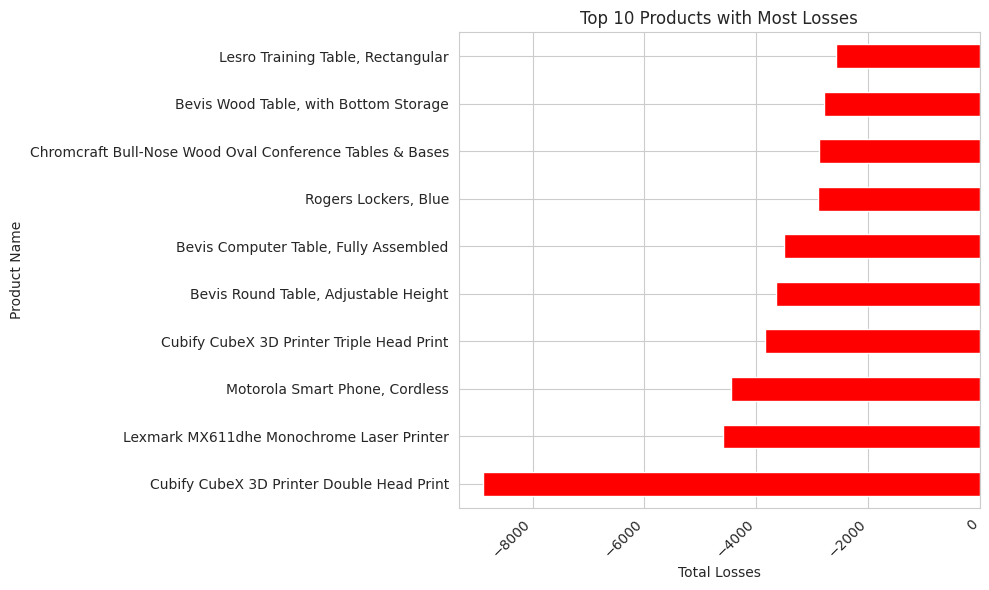

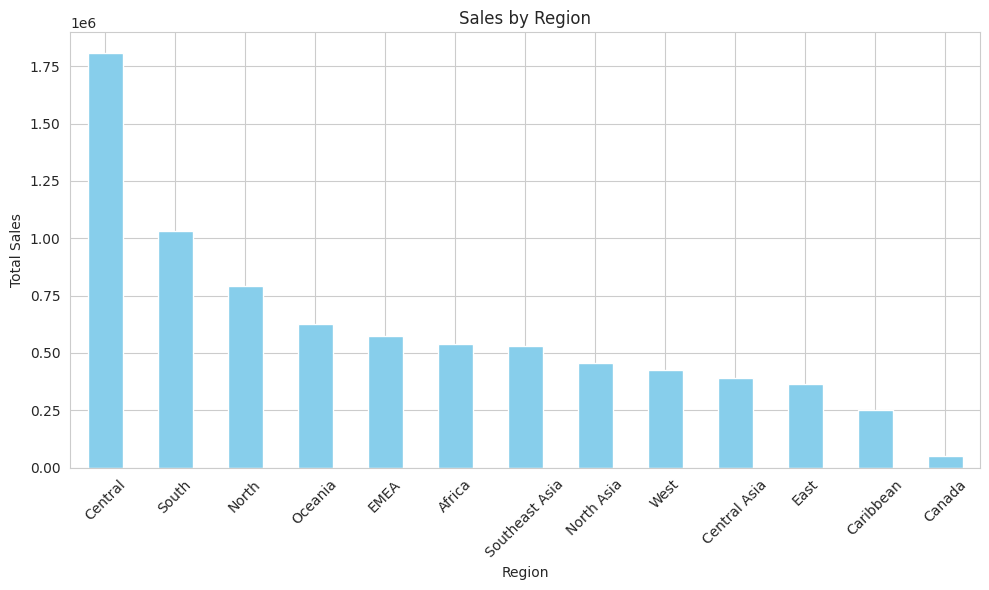

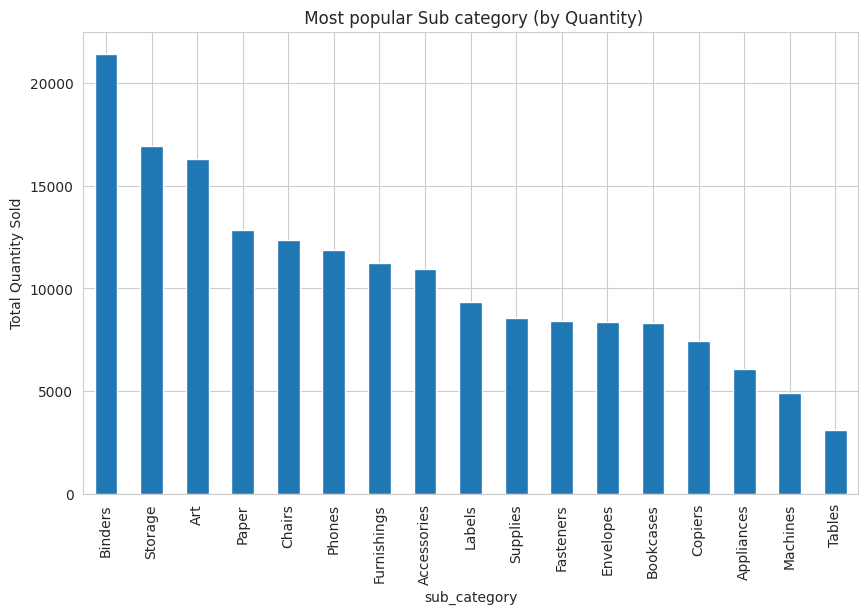

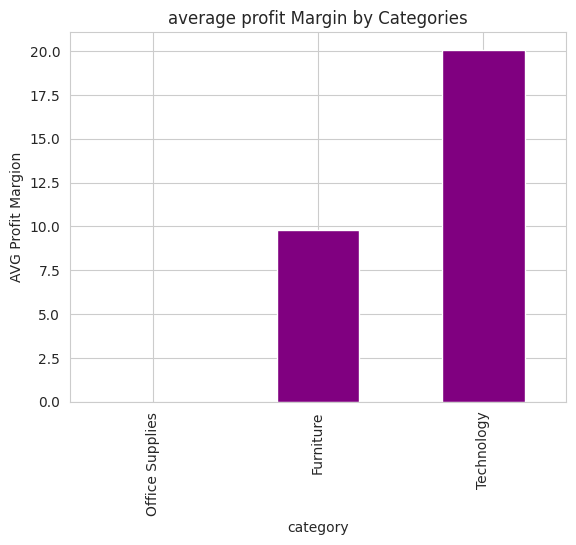

In [1]:
# Superstore Sales Analysis
# Author: Rouaa Romdhani
# Description: Analysis of sales, profit, and product trends using Superstore dataset


# 1. Import Libraries
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('whitegrid')

# 2. Load Dataset from Google Drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/SuperStoreOrders.csv.zip')
df.head(5)

# 3. Data Cleaning
# Convert sales to float (replace comma with dot if needed)
df['sales'] = df['sales'].str.replace(',', '.', regex= False).astype(float)
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y', errors='coerce')
df['ship_date'] = pd.to_datetime(df['ship_date'], format='%d-%M-%y', errors='coerce' )

# 4. Quick Data Overview
df.info()

df.describe()
df.isnull().sum()

df['product_name'].value_counts().head(10)
df.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)
df.groupby('country')['sales'].sum().sort_values(ascending=False).head(10)
df.groupby('year')['sales'].sum().sort_values(ascending= False).head(10)

#5. Profit vs Sales:
plt.figure(figsize=(8,6))
sns.regplot(x='sales', y='profit', data=df, scatter_kws={'alpha':0.3}, line_kws={"color":"red"})
plt.xscale('log')
plt.title('profit vs sales (Log Scale)')
plt.xlabel('sales (Log Scale)')
plt.ylabel('profit')
plt.grid(True)
plt.show()

#Top 10 selling products:
top_products = df['product_name'].value_counts().head(10)
top_products.plot(kind='barh',figsize=(10,5))
plt.title('Top 10 Selling products')
plt.xlabel('number of orders')
plt.ylabel('Product Name')
plt.show()

# 6. Monthly Sales Trend
df['month'] = df['order_date'].dt.to_period('M')
monthly_sales = df.groupby('month')['sales'].sum().reset_index()
monthly_sales['month']= monthly_sales['month'].dt.to_timestamp()

#Monthly sales:
plt.figure(figsize=(10,6))
plt.plot(monthly_sales['month'], monthly_sales['sales'], marker = 'o', color= 'teal')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#top 10 most profitable products:
top_profitable = df.groupby('product_name')['profit'].sum().sort_values(ascending= False).head(10)
top_profitable.plot(kind='barh', color='green', figsize=(10,6), title=' Top 10 Profitable Products')
plt.xlabel('Total profits')
plt.ylabel('Products Name')
plt.tight_layout()
plt.show()

#Top 10 products with most losses:
loss_products= df.groupby('product_name')['profit'].sum().sort_values().head(10)
loss_products.plot(kind = 'barh', color = 'red', figsize=(10,6), title='Top 10 Products with Most Losses')
plt.ylabel('Product Name')
plt.xlabel('Total Losses')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

#Sales by Region Or States:
region_sales = df.groupby('region')['sales'].sum().sort_values(ascending = False)
region_sales.plot(kind = 'bar', color= 'skyblue', figsize=(10,6), title='Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

#Most popular sub_category by quantety sold:
sub_category = df.groupby('sub_category')['quantity'].sum().sort_values(ascending = False)
sub_category.plot(kind = 'bar', figsize= (10,6), title=' Most popular Sub category (by Quantity)')
plt.ylabel('Total Quantity Sold')
plt.show()

#average profit Margin per category
df['profit_margin'] = df['profit'] / df['sales']
category_margin= df.groupby('category')['profit_margin'].mean().sort_values()
category_margin.plot(kind='bar', color = 'purple', title= 'average profit Margin by Categories')
plt.ylabel('AVG Profit Margion')
plt.show()

